In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
sns.set()

In order to detect change between two windows of a stream S, we test if the P(x) in the current window is different from the P(x) in the previous window
Drift has occurred if P(x)ti != P(x)ti+1

To determine if the change in the observed P(x) is the sign of a drift, and that it is not just due to chance, a significance test can be used.

## Kolmogorov-Smirnov Test

Given below are the observed frequencies of grades obtained by a sample of OVGU students in 2018 and 2019.

In [4]:
d = {'2018':[9, 5, 12, 18, 16, 12, 15, 5, 2, 6], 
     '2019':[4, 18, 19, 13, 12, 7, 9, 3, 12, 3],
     'Grade': [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]}
grades = pd.DataFrame(d).set_index('Grade')
grades



,2018,2019
Grade,,
1.0,9,4
1.3,5,18
1.7,12,19
2.0,18,13
2.3,16,12
2.7,12,7
3.0,15,9
3.3,5,3
3.7,2,12


Tirtha believes that the grades of the students have improved from last year (drift). However, Vishnu is skeptical and suspects that the shift in grades is very small and not significant enough to conclude that anything has improved.

The Kolmogorov-Smirnov Test can help them determine who is right.


**KS Test Steps:**
1. Calculate the CDFs of both the distributions
2. Find the maximum absolute difference max|D| between the two CDFS
3. Compare max|D| with the critical value at a desired alpha obtained from the KS table.
4. Conclude that the change is significant if max|D| > critical value

In [5]:
grades['proportion (2018)'] = grades['2018'].apply(lambda x: x/grades['2018'].sum())
grades['proportion (2019)'] = grades['2019'].apply(lambda x: x/grades['2019'].sum())
grades

,2018,2019,proportion (2018),proportion (2019)
Grade,,,,
1.0,9,4,0.09,0.04
1.3,5,18,0.05,0.18
1.7,12,19,0.12,0.19
2.0,18,13,0.18,0.13
2.3,16,12,0.16,0.12
2.7,12,7,0.12,0.07
3.0,15,9,0.15,0.09
3.3,5,3,0.05,0.03
3.7,2,12,0.02,0.12


#### The CDFs and their absolute differences are calculated below

In [6]:
grades['cdf (2018)'] = grades['proportion (2018)'].cumsum()
grades['cdf (2019)'] = grades['proportion (2019)'].cumsum()
grades['D'] = grades.apply(lambda x: np.round(np.abs(x['cdf (2018)'] - x['cdf (2019)']), 2), axis=1)
grades

,2018,2019,proportion (2018),proportion (2019),cdf (2018),cdf (2019),D
Grade,,,,,,,
1.0,9,4,0.09,0.04,0.09,0.04,0.05
1.3,5,18,0.05,0.18,0.14,0.22,0.08
1.7,12,19,0.12,0.19,0.26,0.41,0.15
2.0,18,13,0.18,0.13,0.44,0.54,0.10
2.3,16,12,0.16,0.12,0.60,0.66,0.06
2.7,12,7,0.12,0.07,0.72,0.73,0.01
3.0,15,9,0.15,0.09,0.87,0.82,0.05
3.3,5,3,0.05,0.03,0.92,0.85,0.07
3.7,2,12,0.02,0.12,0.94,0.97,0.03


#### Below is a visualization of the CDFs and their absolute differences

Text(2,0.35,'Max Difference')

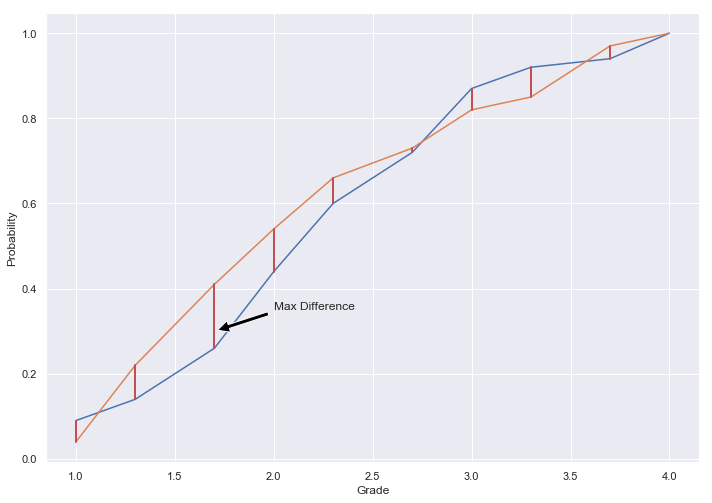

In [10]:
sns.lineplot(data=grades, y="cdf (2018)", x=grades.index)
sns.lineplot(data=grades, y="cdf (2019)", x=grades.index)

def plot_diff_line(index, row):
    plt.plot([index, index], [row['cdf (2019)'], row['cdf (2018)']], color='r', linestyle='-', linewidth=2)
    plt.ylabel("Probability")

    
for index, row in grades.iterrows():
    plot_diff_line(index, row)
    

plt.annotate('Max Difference', xy=(1.7, 0.3), xytext=(2, 0.35), 
             arrowprops=dict(facecolor='black', shrink=0.05)
            )

The Max|D| between the two CDFs is 0.15

From the KS table, the critical value at alpha 0.05 is 1.36/root(n) = 0.136

Since Max|D| > critical value, with 95% confidence, we reject the null hypothesis that the two distributions do not differ, which means we can say that OVGU grades have improved. Tirtha was right.

However, Vishnu contests this and says that 95% confidence isn't good enough. He recommends that they be 99% confident before making such a claim about the improvement in grades.
So, they look at the KS table again, and they get the critical value at alpha 0.01, which is 1.63/root(n) = 0.163

This time, Max|D| < critical value with 99%; therefore, with 99% confidence, we fail to reject the null hypothesis that the two distributions do not differ, which means that the shift in grades might be due to chance, and the distribution might not have drifted

## Finding the distance between two probability distributions: Kulback-Leibler Divergence
This is a measure to calculate the distance between two probability distributions. 
Note: this isn't a distance metric because it violates the symmetry and triangle inequality properties of distance metrics.
We will use the same grade distributions from earlier.


In [11]:
d = {'2018':[9, 5, 12, 18, 16, 12, 15, 5, 2, 6], 
     '2019':[4, 18, 19, 13, 12, 7, 9, 3, 12, 3],
     'Grade': [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0]}
grades = pd.DataFrame(d).set_index('Grade')
grades

,2018,2019
Grade,,
1.0,9,4
1.3,5,18
1.7,12,19
2.0,18,13
2.3,16,12
2.7,12,7
3.0,15,9
3.3,5,3
3.7,2,12


The formula for the KL Divergence is 
$$ D_{kl}(P||Q) = \sum P(x) \times log(\frac{P(x)}{Q(x)})$$
The $ \frac{P(x)}{Q(x)} $ part is a ratio. Therefore, if the two distributions P and Q are almost identical, the probability of x in distribution P will be almost equal to the probability of x in distribution Q, so the ratio will be close to 1. $ \frac{0.8}{0.79} = 1.01 $
Since the log of a number close to 1 is close to 0, summing multiple numbers close to 0 will result in a low KL Divergence.

In [12]:
def kl_divergence(P, Q):
    kl = 0
    for i in range(len(P)):
        kl += P[i] * np.log(P[i]/Q[i])
    return np.round(kl, 3)

**Steps to calculate KL Divergence for discrete data:**
1. Calculate the probabilities for the two distributions from the data
2. Apply the formula

,2018,2019,P(x),Q(x)
Grade,,,,
1.0,9,4,0.09,0.04
1.3,5,18,0.05,0.18
1.7,12,19,0.12,0.19
2.0,18,13,0.18,0.13
2.3,16,12,0.16,0.12
2.7,12,7,0.12,0.07
3.0,15,9,0.15,0.09
3.3,5,3,0.05,0.03
3.7,2,12,0.02,0.12


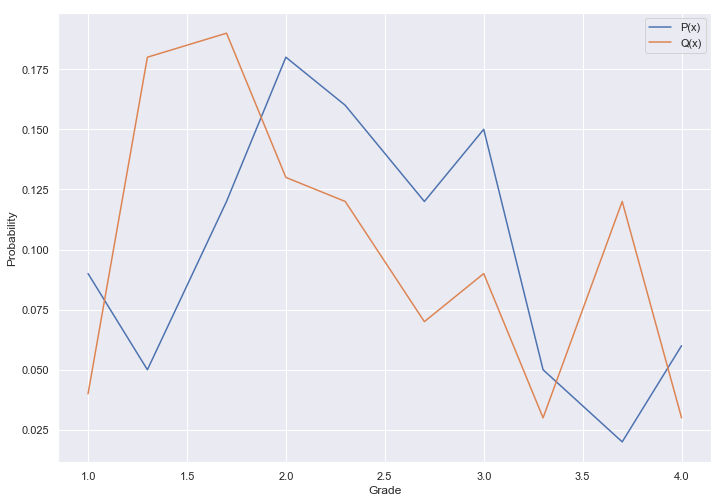

In [13]:
# Calculate probability distribution
grades['P(x)'] = grades['2018'].apply(lambda x: x/grades['2018'].sum())
grades['Q(x)'] = grades['2019'].apply(lambda x: x/grades['2019'].sum())
display(grades)
ax = sns.lineplot(data=grades, x=grades.index, y="P(x)", label="P(x)")
ax = sns.lineplot(data=grades, x=grades.index, y="Q(x)", label="Q(x)")
ax.set(ylabel='Probability', xlabel='Grade')
plt.show()

In [14]:
px = grades['P(x)'].to_numpy()
qx = grades['Q(x)'].to_numpy()
print(kl_divergence(px, qx))
print(kl_divergence(qx, px))

0.231
0.304


#### The KL Divergence between P and Q is 0.242

#### If this divergence goes beyond a user-specified threshold, drift is signalled.